qPRC workflow
=============
qPRC main workflow in a single, hopefully simple, notebook.

Dependencies
------------

In [1]:
# standard library modules
import os


# external modules
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

Global settings
----------------

In [2]:
DATA_LOC = '../data/'

Parsing the data
-----------------

In [3]:
filepath = os.path.join(DATA_LOC, 'raw_input.csv')
! head -n 2 $filepath

Well,Dye Name,Reading 1,Reading 2,Reading 3,Reading 4,Reading 5,Reading 6,Reading 7,Reading 8,Reading 9,Reading 10,Reading 11,Reading 12,Reading 13,Reading 14,Reading 15,Reading 16,Reading 17,Reading 18,Reading 19,Reading 20,Reading 21,Reading 22,Reading 23,Reading 24,Reading 25,Reading 26,Reading 27,Reading 28,Reading 29,Reading 30,Reading 31,Reading 32,Reading 33,Reading 34,Reading 35,Reading 36,Reading 37,Reading 38,Reading 39,Reading 40,Reading 41,Reading 42,Reading 43,Reading 44,Reading 45,Reading 46,Reading 47,Reading 48,Reading 49,Reading 50,Reading 51,Reading 52,Reading 53,Reading 54,Reading 55,Reading 56,Reading 57,Reading 58,Reading 59,Reading 60,Reading 61,Reading 62,Reading 63,Reading 64,Reading 65,Reading 66,Reading 67,Reading 68,Reading 69,Reading 70,Reading 71,Reading 72,Reading 73,Reading 74,Reading 75,Reading 76,Reading 77,Reading 78,Reading 79,Reading 80,Reading 81,Reading 82,Reading 83,Reading 84,Reading 85,Reading 86,Reading 87,Reading 88,Reading 89,Reading 90,Readi

In [4]:
dna = pd.read_csv(filepath, index_col=[0,1])
dna = dna.transpose()
dna.index = [int(s.split(' ')[1]) for s in dna.index]
dna.index.name = 'cycle'
#dna.columns
dna.head()

Well                15                         16                          17  \
Dye Name           ROX         SYBR           ROX          SYBR           ROX   
cycle                                                                           
1         50718.367188  5318.887207  57887.613281  33920.878906  53284.023438   
2         51313.871094  5319.723145  58529.898438  34382.972656  53991.269531   
3         51656.718750  5502.428711  58904.281250  34775.125000  54442.910156   
4         51801.609375  5654.279297  59058.332031  34852.347656  54659.476563   
5         51964.367188  5661.381836  59207.218750  34564.160156  54847.093750   

Well                              18                          19  \
Dye Name          SYBR           ROX          SYBR           ROX   
cycle                                                              
1         30377.804688  49185.601563  19894.083984  58374.417969   
2         30802.255859  47991.695313  21463.738281  58777.265625   
3         31073.466797  47495.050781  22455.042969  59029.562500   
4         31155.664063  47424.453125  22938.957031  59083.628906   
5         31097.007813  47456.546875  23155.125000  59162.906250   

Well                        ...                  44                \
Dye Name          SYBR      ...                 ROX          SYBR   
cycle                       ...                                     
1         23573.378906      ...        94933.070313  35734.375000   
2         26820.228516      ...        95864.281250  36351.441406   
3         28510.072266      ...        96518.070313  36885.535156   
4         29043.996094      ...        96841.328125  37157.957031   
5         29435.638672      ...        97093.429688  37162.527344   

Well                45                           46                \
Dye Name           ROX          SYBR            ROX          SYBR   
cycle                                                               
1         93904.476563  30905.425781  105897.640625  24347.509766   
2         95067.859375  31462.052734  107160.507813  24351.603516   
3         95763.320313  31842.537109  107968.500000  24459.154297   
4         96063.695313  31980.916016  108297.554688  24571.220703   
5         96271.257813  32102.951172  108553.015625  24484.470703   

Well                 47                          48                 
Dye Name            ROX          SYBR           ROX           SYBR  
cycle                                                               
1         147489.656250  37397.796875  27118.876953  133027.968750  
2         149480.093750  38126.917969  27046.447266  132011.218750  
3         150645.390625  38287.609375  26924.074219  131143.328125  
4         151119.484375  38157.128906  26859.259766  130266.812500  
5         151471.281250  38177.941406  26733.949219  129527.695313  

[5 rows x 60 columns]

Plotting
---------

Some examples of selecting data. [loc](http://pandas.pydata.org/pandas-docs/stable/indexing.html#different-choices-for-indexing-loc-iloc-and-ix) is a label-based selection method.

All rows, single column.

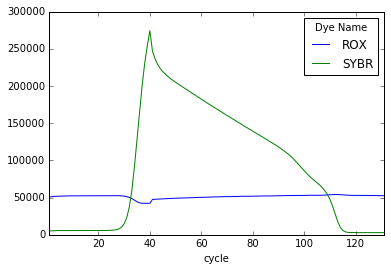

In [5]:
dna.loc[:, 15].plot()
plt.show()

First 5 rows, 2 columns.

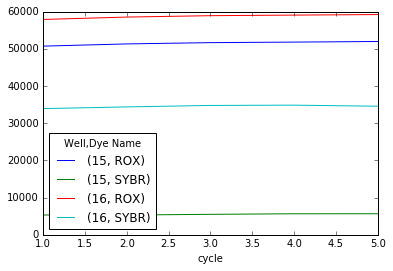

In [6]:
dna.loc[:5, 15:16].plot()
plt.show()

Single dye only.

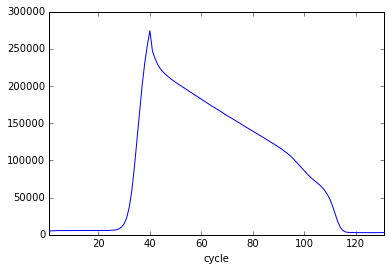

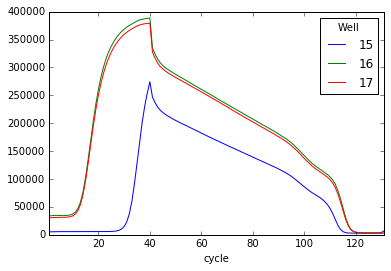

In [7]:
dna.loc[:,(15, 'SYBR')].plot()
plt.show()
# cross-section in columns: axis=1
# two levels: 0 (cycle) and 1 (dye)
dna.xs('SYBR', level=1, axis=1).loc[:,15:17].plot()
plt.show()

Modeling
--------
Automatically slice.

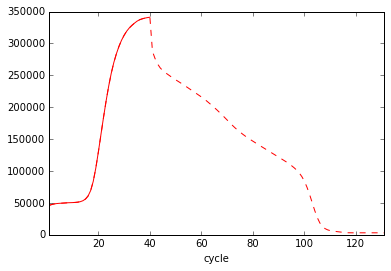

In [8]:
#concentrations = dna.loc[:,(31, 'SYBR')][:40].values
concentrations_raw = dna.loc[:,(31, 'SYBR')]
concentrations_raw.plot(style='r--')
conc_diff = concentrations_raw.diff()
decrease_start_index = conc_diff[conc_diff<0].index[0]
concentrations_series = concentrations_raw[: decrease_start_index - 1]
concentrations_series.plot(style='r-')
concentrations = concentrations_series.values

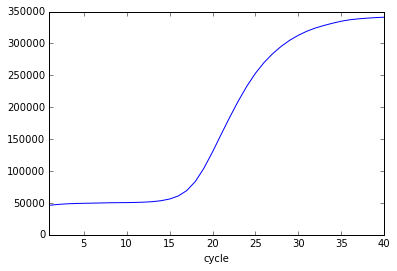

In [9]:
concentrations_series.plot()
plt.show()

### Older model

Fit the model.

In [10]:
import numpy as np
import math
from scipy.optimize import curve_fit
import ipdb

k = 1
n = 5
nx = 1
nc = 5
mode = 0
maxit = 100000
iprt = 0

# input_file_name = 'inp.txt'

# concentrations = np.loadtxt(input_file_name)

# offset
offset = np.mean(concentrations[5:8])

# expression
last_reading = concentrations[-1]
index = np.where((concentrations - offset) > 0.1 * last_reading)[0][0]
expression = ((concentrations[index] - offset) /
              math.exp(math.log(2.0)*index*1.0))

# rate
rate = 1.0

# reactants
reactants = last_reading/2.0

# power
power = 1.0

sy = concentrations.copy()
for i, elm in enumerate(concentrations):
    if (elm > 1.5 * offset) and (elm < 0.5 * last_reading):
        sy[i] = 0.5
    elif (i < index - 10):
        sy[i] = 2.5
    elif (elm > last_reading/1.5):
        sy[i] = 1.2

# bounds
al = 0.0
variables = np.array([5*offset, last_reading, 1.01, last_reading + 10.0, 3.0])
print(variables)

def f(meas, offset, n0, gama, nn, alfa):
    meas_calc = np.zeros(len(meas))
    for i in meas:
        # ipdb.set_trace()
        broj = np.zeros(i)
        if n0 < 0 or nn < 0:
            return np.repeat(1e10, len(meas))
        broj[0] = n0
        suma = n0
        for idx in range(1, i):
            broj[idx] = broj[idx - 1] * (1.0 + gama /
                                         (1.0 +
                                          math.exp(alfa * math.log(suma / nn))))
            suma = suma + broj[idx]

        meas_calc[i - 1] = broj[-1] + offset
    return meas_calc

times = list(range(1, len(concentrations) + 1))
fitted_params = curve_fit(f, times, concentrations, p0=variables)
params = fitted_params[0]
print(params)

[  2.49657656e+05   3.41212406e+05   1.01000000e+00   3.41222406e+05
   3.00000000e+00]
[  4.82588558e+04   2.19956974e+01   5.50689842e-01   3.51287979e+05
   1.68330183e+00]


In [11]:
concentrations

array([  46291.660156,   47628.90625 ,   48538.496094,   49069.910156,
         49409.421875,   49651.507813,   49918.171875,   50224.914063,
         50366.925781,   50520.902344,   50773.109375,   51177.683594,
         51961.804688,   53454.484375,   56117.375   ,   60834.640625,
         69399.929688,   83715.734375,  104588.578125,  130064.46875 ,
        157435.71875 ,  184299.59375 ,  209869.171875,  233132.03125 ,
        253379.796875,  270186.34375 ,  283986.75    ,  295564.625   ,
        305173.65625 ,  312926.59375 ,  319316.8125  ,  324381.90625 ,
        328349.5     ,  331837.25    ,  334953.1875  ,  337200.78125 ,
        338646.375   ,  339733.9375  ,  340569.21875 ,  341212.40625 ])

In [12]:
f(times, *params) - concentrations

array([ 1989.19132887,   664.05804097,  -226.74860425,  -729.0357793 ,
       -1023.38083874, -1195.42768078, -1353.48414554, -1491.81406017,
       -1372.68524834, -1121.7621101 ,  -746.25324759,  -177.94991851,
         544.88538075,  1383.59836774,  2318.45679674,  3124.13418795,
        2946.81120648,  1100.78931409, -1972.34424953, -3773.8524297 ,
       -2820.79128873,   132.74733638,  2430.04731956,  3104.8976848 ,
        2504.63009253,  1553.72804806,   545.98305598,  -626.87109113,
       -1674.64196474, -2294.69483395, -2668.71605155, -2600.75699534,
       -2142.34881109, -1777.05058493, -1509.60833716,  -762.9959074 ,
         459.90727025,  1765.72836868,  3089.47998486,  4404.13987871])

Plot the model.

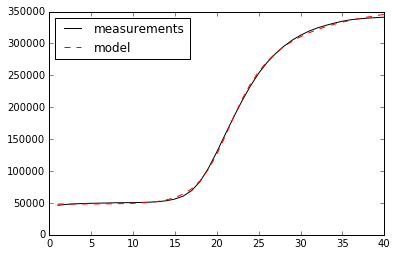

In [13]:
fitted_vals = f(times, *params)

plt.plot(times, concentrations, 'k-', label='measurements')
plt.plot(times, fitted_vals, 'r--', label='model')
plt.legend(loc='upper left')
plt.show()

### Newer model

Add the qPRC package to the system path, so that we can include the module from there.

In [14]:
import sys
qprc_path = os.path.abspath(os.path.join('..'))
print(qprc_path)
if qprc_path not in sys.path:
    sys.path.append(qprc_path)
sys.path

/Users/kermit/projekti/git/qprc


['',
 '/Users/kermit/.virtualenvs/s3/lib/python35.zip',
 '/Users/kermit/.virtualenvs/s3/lib/python3.5',
 '/Users/kermit/.virtualenvs/s3/lib/python3.5/plat-darwin',
 '/Users/kermit/.virtualenvs/s3/lib/python3.5/lib-dynload',
 '/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5',
 '/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5/plat-darwin',
 '/Users/kermit/.virtualenvs/s3/lib/python3.5/site-packages',
 '/usr/local/Cellar/python3/3.5.0/Frameworks/Python.framework/Versions/3.5/lib/python3.5/site-packages',
 '/Users/kermit/.virtualenvs/s3/lib/python3.5/site-packages/IPython/extensions',
 '/Users/kermit/.ipython',
 '/Users/kermit/projekti/git/qprc']

In [15]:
variables

array([  2.49657656e+05,   3.41212406e+05,   1.01000000e+00,
         3.41222406e+05,   3.00000000e+00])

[  4.85642748e+04   8.73408643e+00   6.49551324e-01   3.38866798e+05
   9.35599025e-01]


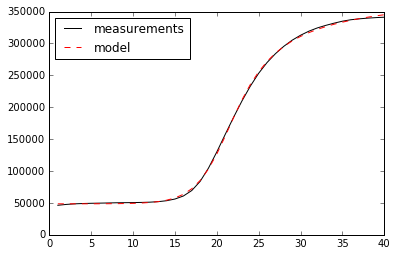

In [16]:
from qPRC.lib.fitter import f

# older model function – check ../qPRC/lib/fitter.py (imported above) for the newest version
# def f(meas, offset, n0, gama, nn, alfa):
#     meas_calc = np.zeros(len(meas))
#     for i in meas:
#         num = np.zeros(i)
#         prim = np.zeros(i)
#         if n0 < 0 or nn < 0:
#             return np.repeat(1e10, len(meas))
#         num[0] = n0
#         summ = n0
#         prim[0] = nn
#         for idx in range(1, i):
#             num[idx] = num[idx - 1] * (
#                 1.0 + gama / (1.0 + alfa * (summ / prim[idx - 1]))
#             )
#             summ = summ + num[idx]
#             prim[idx] = prim[idx - 1] - (num[idx] - num[idx - 1])

#         meas_calc[i - 1] = num[-1] + offset
#     return meas_calc

# obtained by randomly tweaking the output params and passing them into the curve_fit again
good_variables = [1.76050783e+05, 5.78e+02, +1.13766225e+00, 7.42308865e+05, 8.11068606e+00]
times = list(range(1, len(concentrations) + 1))
fitted_params = curve_fit(f, times, concentrations, p0=good_variables)
params = fitted_params[0]
print(params)

fitted_vals = f(times, *params)

plt.plot(times, concentrations, 'k-', label='measurements')
plt.plot(times, fitted_vals, 'r--', label='model')
plt.legend(loc='upper left')
plt.show()